In [1]:
import pandas as pd

#Import dataset
df = pd.read_csv('titanic.csv')
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [2]:
#Drop extra things
df.drop(['Parents/Children Aboard','Name','Fare'],inplace=True,axis=1)
df.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard
0,0,3,male,22.0,1
1,1,1,female,38.0,1
2,1,3,female,26.0,0
3,1,1,female,35.0,1
4,0,3,male,35.0,0


In [3]:
df['Sex']=df['Sex'].map({
 'male':1,
 'female':0,
})
df.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard
0,0,3,1,22.0,1
1,1,1,0,38.0,1
2,1,3,0,26.0,0
3,1,1,0,35.0,1
4,0,3,1,35.0,0


In [8]:
#Making x and y axis 
#The x-axis will have all the other values in it
#The y-axis will have Pclass (which has category 1,2 and 3) in it. Hence, the output variable has 3 values in it.

#Here, we look to find the passenger's class who is travelling,
#based on the other attributes available to us

X = df.drop(['Pclass'], axis=1)
y = df['Pclass']
print(X[:5])
print()
print(y[:5])

   Survived  Sex   Age  Siblings/Spouses Aboard
0         0    1  22.0                        1
1         1    0  38.0                        1
2         1    0  26.0                        0
3         1    0  35.0                        1
4         0    1  35.0                        0

0    3
1    1
2    3
3    1
4    3
Name: Pclass, dtype: int64


In [9]:
#breaking our dataset

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [10]:
#printing the details of our dataset after splitting 

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(709, 4)
(178, 4)
(709,)
(178,)


In [11]:
# Training the Naive Bayes model on the Training set


from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [14]:
y_pred = classifier.predict(x_test)
print('Predicted Value')
print(y_pred[:5])
print('Actual Value')
print(y_test[:5])

Predicted Value
[3 3 3 1 3]
Actual Value
14     3
158    3
762    1
740    3
482    3
Name: Pclass, dtype: int64


/var/folders/kb/2qtwss7n3y3091dclgrcn9hm0000gn/T/ipykernel_20988/2381774008.py:5: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print(y_test[:5])


In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score

acc = accuracy_score(y_pred,y_test)
print("Accuracy : ",acc)

Accuracy :  0.6179775280898876


In [17]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[25,  2, 12],
       [ 9,  2, 15],
       [22,  8, 83]])

In [22]:
print('Accuracy : ' , accuracy_score(y_test, y_pred))

from sklearn import metrics

print('Precison  : ' , metrics.precision_score(y_test, y_pred, average="weighted"))
print('Recall Score : ' , metrics.recall_score(y_test, y_pred, average="weighted"))
print('F1 Score : ' , metrics.f1_score(y_test, y_pred, average="weighted"))
print('MCC : ' , metrics.matthews_corrcoef(y_test, y_pred))

Accuracy :  0.6179775280898876
Precison  :  0.6011667639476629
Recall Score :  0.6179775280898876
F1 Score :  0.6032570214774604
MCC :  0.2818948457490423


In [24]:
#complete classification report

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.45      0.64      0.53        39
           2       0.17      0.08      0.11        26
           3       0.75      0.73      0.74       113

    accuracy                           0.62       178
   macro avg       0.46      0.48      0.46       178
weighted avg       0.60      0.62      0.60       178



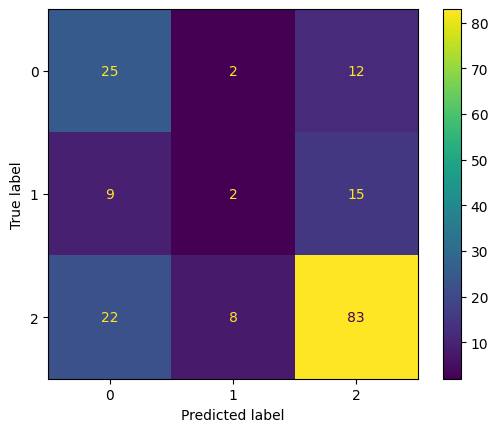

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

labels = [1,0]
cm = metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot();
plt.show();

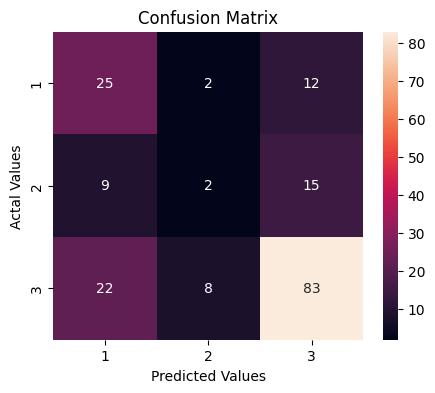

In [28]:
#The other detailed look 

cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,
                     index = ['1','2','3'], 
                     columns = ['1','2','3'])
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()